# Embryonic day 6.25: clustering and diffusion pseudotime analyses

In [1]:
%matplotlib inline

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import scipy
import matplotlib
import matplotlib.pyplot as plot
from collections import Counter
import sklearn
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from numba import jit
from scipy import spatial
import hvplot.pandas
import umap

In [ ]:
print(sc.__version__)
print(pd.__version__)
print(np.__version__)
print(ad.__version__)
print(scipy.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(umap.__version__)

In [3]:
#CHANGE THIS TO YOUR PATH
data_path='/Users/jonathan/Desktop/MUNCHEN/Project_AVE_migration/DRAFT_PAPER/GIT_REPO/DATA/'

# Clustering

## Highly variable genes (HVGs) selection

In [4]:
norm_data=ad.read_h5ad(data_path+'norm_data_625.h5ad')

sc.pp.log1p(norm_data)    #log-normalize data
norm_data.raw = norm_data

sc.pp.highly_variable_genes(norm_data,max_mean=10,n_top_genes=3000)  #calculate highly variable genes
high_var = norm_data[:,norm_data.var['highly_variable']==True]  #select only highly variable genes

## Cluster Spearman correlation matrix using dynamic tree cut

In [5]:
high_var_df=high_var.to_df()

In [12]:
%get high_var_df

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

#Robustness analysis for clustering

data<-as.matrix(t(high_var_df))

# nr of random samples
nrRepeats = 50
# percent of HVGs to keep
percent = 50
# nr of HVGs kept
sampleSize <- round(length(rownames(data))*percent/100)

# function for the random samples
# indexVector is a vector with the indices of HVG
myRandSample <- function(indexVector){
        idxMatrix <- matrix(rep(NA, sampleSize*nrRepeats)
                            ,nrow = nrRepeats)
        for (i in 1:nrow(idxMatrix)){
                mySample <- sample(indexVector
                                   ,size = sampleSize)
                idxMatrix[i,] <- mySample
        }
        idxMatrix
}

# indices of all HVGs
HVGidx <- rownames(data)
RandIdxMatrix <- myRandSample(HVGidx)

# function to calculated clusters
calculateClusters <- function(geneIndices,deepSplit){
    cor.mat<-cor(data[geneIndices,],method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=10, method="hybrid", deepSplit =deepSplit)
    
    clust
}

VarInfoVector <- matrix(rep(NA, nrRepeats * 5),ncol = 5)
colnames(VarInfoVector) <- c(0,1,2,3,4)

for(j in 0:4){
    tot.clust <- calculateClusters(HVGidx,j)
    for (i in 1:nrow(RandIdxMatrix)){
        # take indices of HVGs from the RandIdxMatrix of the i-th iteration
        indices <- RandIdxMatrix[i,]
        # calculate the cluster statistics with these indices and deepSplit == j
        subsample.clust <- calculateClusters(indices,j)
        if(length(duplicated(indices)[duplicated(indices) == TRUE])>0){print(ERROR)}
        #Calculate the variation of information between the two clustering (whole dataset and subsampled data)
        VarInfoVector[i,j+1] <- vi.dist(tot.clust,subsample.clust)
    }
}


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust






[1] 1500
 ..cutHeight not given, setting it to 0.533  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.532  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.534  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.53  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.525  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.53  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.52  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.531  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.539  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting

 ..done.
 ..cutHeight not given, setting it to 0.536  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.533  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.532  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.536  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.532  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.529  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.541  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.534  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.53  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setti

 ..done.
 ..cutHeight not given, setting it to 0.532  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.534  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.53  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.525  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.53  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.52  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.531  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.539  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.546  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting

 ..done.
 ..cutHeight not given, setting it to 0.533  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.532  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.536  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.532  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.529  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.541  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.534  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.53  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.533  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setti

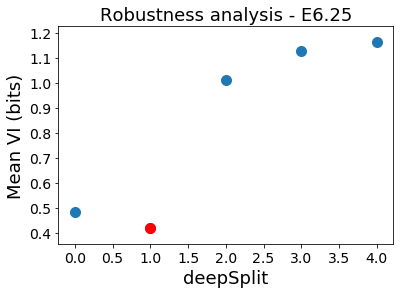

(None, None)

In [14]:
%get VarInfoVector --from R

plot.rcParams.update({'axes.titlesize': 18})
plot.rcParams.update({'axes.labelsize': 18})

#Plot the robustness curve and choose deepSplit for clustering
plot.figure()
plot.title('Robustness analysis - E6.25')
plot.xlabel('deepSplit')
plot.ylabel('Mean VI (bits)')
plot.xticks(fontsize=14)
plot.yticks(fontsize=14)
plot.scatter(np.arange(0,5),np.mean(VarInfoVector,axis=0),s=100)
plot.scatter(1,np.mean(VarInfoVector,axis=0)[1],c='r',s=100)
plot.show(),plot.close()

## First clustering step

In [6]:
%get high_var_df

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

data<-as.matrix(t(high_var_df))


cor.mat<-cor(data,method="spearman")
print(dim(cor.mat))
dissim<-sqrt((1-cor.mat)/2)
dist.mat<-as.dist(dissim)
test.clust<-hclust(dist.mat, method="average")
clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=10, method="hybrid", deepSplit =1)

dist.mat <- as.matrix(dist.mat)


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust






[1] 238 238
 ..cutHeight not given, setting it to 0.533  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [7]:
%get clust --from R
%get dist.mat --from R

high_var.obs['clusters']=list(clust.astype(str))

embedding = umap.UMAP(n_neighbors=30,
min_dist=0.1,random_state=0,
metric='precomputed').fit_transform(dist_mat)
high_var.obsm['X_umap']=embedding

norm_data.obs['clusters']=high_var.obs['clusters']

Variable dist.mat is put to SoS as dist_mat
/usr/local/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/usr/local/lib/python3.7/site-packages/sos_r/kernel.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  #!/usr/bin/env python3
/usr/local/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../../../usr/local/lib/p

## Robustness of each cluster and second clustering step

In [8]:
#Subset data for each cluster and find HVGs in each cluster
norm_data_1=norm_data[norm_data.obs['clusters']=='1',:]
norm_data_2=norm_data[norm_data.obs['clusters']=='2',:]
norm_data_3=norm_data[norm_data.obs['clusters']=='3',:]

sc.pp.highly_variable_genes(norm_data_1,max_mean=10,n_top_genes=3000)  #calculate highly variable genes
high_var_1 = norm_data_1[:,norm_data_1.var['highly_variable']==True]

sc.pp.highly_variable_genes(norm_data_2,max_mean=10,n_top_genes=3000)  #calculate highly variable genes
high_var_2 = norm_data_2[:,norm_data_2.var['highly_variable']==True]

sc.pp.highly_variable_genes(norm_data_3,max_mean=10,n_top_genes=3000)  #calculate highly variable genes
high_var_3 = norm_data_3[:,norm_data_3.var['highly_variable']==True]

In [9]:
high_var1_df=high_var_1.to_df()
high_var2_df=high_var_2.to_df()
high_var3_df=high_var_3.to_df()

In [10]:
# %get high_var1_df

# #Robustness analysis: change the number X of the high_varX_df to compute the robustness curve for a cluster

# data<-as.matrix(t(high_var1_df))

# # indices of all HVGs
# HVGidx <- rownames(data)
# bootstrapIdxMatrix <- myBootstrap(HVGidx)

# VarInfoVector <- matrix(rep(NA, nrRepeats * 5),ncol = 5)
# colnames(VarInfoVector) <- c(0,1,2,3,4)

# for(j in 0:4){
#     tot.clust <- calculateClusters(HVGidx,j)
# #    print(max(tot.clust))
#     for (i in 1:nrow(bootstrapIdxMatrix)){
# #        # take indices of HVGs from the bootstrapIdxMatrix of the i-th iteration
#         indices <- bootstrapIdxMatrix[i,]
#         # calculate the cluster statistics with these indices and deepSplit == j
#         subsample.clust <- calculateClusters(indices,j)
#         if(length(duplicated(indices)[duplicated(indices) == TRUE])>0){print(ERROR)}
#         #Calculate the variation of information between the two clustering (whole dataset and subsampled data)
#         VarInfoVector[i,j+1] <- vi.dist(tot.clust,subsample.clust)
#     }
# }

In [11]:
#%get VarInfoVector --from R


#plot robustness curve for a specific cluster
#plot.figure()
#plot.title('minClusterSize=10')
#plot.xlabel('deepSplit')
#plot.ylabel(r'$\bar{VI}$ (50 random samples)')
#plot.plot(np.arange(0,5),np.mean(VarInfoVector,axis=0),'o')
#plot.show()
#plot.close()

Subclustering after choice of the values of deepSplit from the robustness analysis.

In [12]:
%get high_var1_df
%get high_var2_df
%get high_var3_df

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

finalClus <- function(df,deepSplit){
    data<-as.matrix(t(df))
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=10,
                         method="hybrid", deepSplit =deepSplit)
    clust
}

clust1<-finalClus(high_var1_df,1)
clust2<-finalClus(high_var2_df,2)
clust3<-finalClus(high_var3_df,1)

 ..cutHeight not given, setting it to 0.502  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.534  ===>  99% of the (truncated) height range in dendro.
 ..done.
 ..cutHeight not given, setting it to 0.506  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [13]:
%get clust1 --from R
%get clust2 --from R
%get clust3 --from R

high_var_1.obs['clusters']=list(clust1.astype(str))
high_var_2.obs['clusters']=list(clust2.astype(str))
high_var_3.obs['clusters']=list(clust3.astype(str))

#Re-assign labels to the clusters, merge them and then delete the 0 labels
arr=["" for x in range(len(high_var.obs['clusters']))]

for i in range(len(high_var.obs['clusters'])):
    if high_var.obs['clusters'][i]=='0':
        arr[i]='0'
    elif high_var.obs['Run lane'][i] in high_var_1.obs['clusters']:
        idx=list(high_var_1.obs['Run lane']).index(high_var.obs['Run lane'][i])
        if high_var_1.obs['clusters'][idx]=='0':
            arr[i]='0'
        elif high_var_1.obs['clusters'][idx]=='1':
            arr[i]='1'
        elif high_var_1.obs['clusters'][idx]=='2':
            arr[i]='4'
        elif high_var_1.obs['clusters'][idx]=='3':
            arr[i]='5'
    if high_var.obs['Run lane'][i] in high_var_2.obs['clusters']:
        idx=list(high_var_2.obs['Run lane']).index(high_var.obs['Run lane'][i])
        if high_var_2.obs['clusters'][idx]=='0':
            arr[i]='0'
        elif high_var_2.obs['clusters'][idx]=='1':
            arr[i]='2'
    if high_var.obs['Run lane'][i] in high_var_3.obs['clusters']:
        idx=list(high_var_3.obs['Run lane']).index(high_var.obs['Run lane'][i])
        if high_var_3.obs['clusters'][idx]=='0':
            arr[i]='0'
        elif high_var_3.obs['clusters'][idx]=='1':
            arr[i]='3'
            
high_var.obs['clusters_new']=list(arr)
norm_data.obs['clusters_new']=high_var.obs['clusters_new']

high_var=high_var[high_var.obs['clusters_new']!='0',:]
norm_data=norm_data[norm_data.obs['clusters_new']!='0',:]

Warning message in if (is.nan(obj)) {:
“la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato”
Warning message in if (is.nan(obj)) {:
“la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato”
Warning message in if (is.nan(obj)) {:
“la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato”


## Separation of cluster 1 into two clusters using pam clustering

In [14]:
norm_data_1=norm_data[norm_data.obs['clusters']=='1',:]

sc.pp.highly_variable_genes(norm_data_1,max_mean=10,n_top_genes=3000)  #calculate highly variable genes
high_var_1 = norm_data_1[:,norm_data_1.var['highly_variable']==True]

high_var1_df=high_var_1.to_df()

In [15]:
%get high_var1_df

library(cluster, quietly = TRUE, warn.conflicts = FALSE)

kmedClus <- function(df,K.clus){
    data<-as.matrix(t(df))
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    clust<-pam(dissim,k=K.clus,diss=TRUE,cluster.only=TRUE)
    clust
}

cl <- kmedClus(high_var1_df, 2)

In [16]:
%get cl --from R

high_var_1.obs['clusters']=list(cl.astype(str))

arr=["" for x in range(len(high_var.obs['clusters_new']))]

for i in range(len(high_var.obs['clusters_new'])):
    if high_var.obs['Run lane'][i] in high_var_1.obs['clusters']:
        idx=list(high_var_1.obs['Run lane']).index(high_var.obs['Run lane'][i])
        if high_var_1.obs['clusters'][idx]=='1':
            arr[i]='1'
        elif high_var_1.obs['clusters'][idx]=='2':
            arr[i]='4'
    else:
        arr[i]=high_var.obs['clusters_new'][i]
        
high_var.obs['clusters_new']=list(arr)
norm_data.obs['clusters_new']=high_var.obs['clusters_new']

## Outlier detection in cluster 2

We use an outlier detection algorithm based on the distance from the k-nearest neighbours for each cell to identify  Epi and ExE from cluster 2

1    66
0     9
Name: outliers, dtype: int64


... storing 'clusters' as categorical
... storing 'clusters_new' as categorical


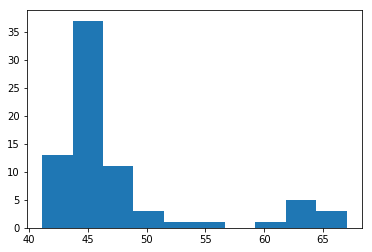

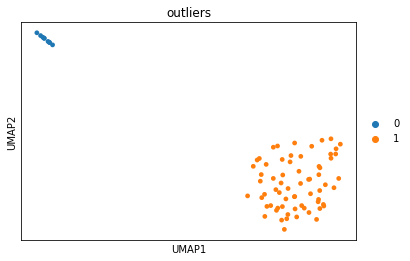

In [17]:
from pyod.models.knn import KNN
from sklearn.cluster import KMeans

clf_name = 'KNN'
clf = KNN(n_neighbors=10,contamination=0.1)
clf.fit(high_var[high_var.obs['clusters_new']=='2',:].X)

plot.hist(clf.decision_scores_)


km = KMeans(n_clusters=2)
km.fit(clf.decision_scores_.reshape(-1,1))

high_var_cl_2=high_var[high_var.obs['clusters_new']=='2',:]
high_var_cl_2.obs['outliers']=list(km.labels_)
high_var_cl_2.obs['outliers']=high_var_cl_2.obs['outliers'].astype('category')

print(high_var_cl_2.obs['outliers'].value_counts())

sc.pl.umap(high_var_cl_2,color=['outliers'],s=90)

## Cell type annotation

In [18]:
#Define the new cluster labels for Epi and ExE
arr=["" for x in range(len(high_var.obs['clusters']))]

for i in range(len(high_var.obs['clusters_new'])):
    if high_var.obs['Run lane'][i] in high_var_cl_2.obs['clusters_new']:
        idx=list(high_var_cl_2.obs['Run lane']).index(high_var.obs['Run lane'][i])
        if high_var_cl_2.obs['outliers'][idx]==0:
            arr[i]='2'
        elif high_var_cl_2.obs['outliers'][idx]==1:
            arr[i]='5'
    else:
        arr[i]=high_var.obs['clusters_new'][i]
        
high_var.obs['clusters_new']=list(arr)
norm_data.obs['clusters_new']=high_var.obs['clusters_new']

## Cell type annotation

In [19]:
#Annotate the clusters
high_var.obs['clusters_anno']=high_var.obs['clusters_new']
high_var.obs['clusters_anno']=high_var.obs['clusters_anno'].astype('category')

high_var.obs['clusters_anno'].cat.categories= ['Epi-VE','Epi','AVE','ExE-VE','ExE']
norm_data.obs['clusters_anno']=high_var.obs['clusters_anno']

high_var.obs['clusters_anno']=high_var.obs['clusters_anno'].cat.reorder_categories(['AVE','Epi-VE','ExE-VE','Epi', 'ExE'])

... storing 'clusters' as categorical
... storing 'clusters_new' as categorical


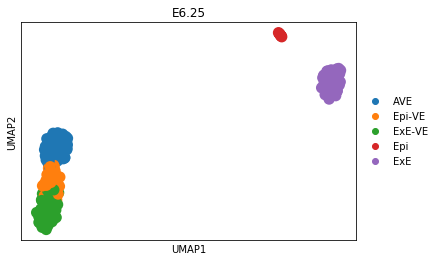

In [20]:
# Show the UMAP with the annotated cell types
sc.pl.umap(high_var,color='clusters_anno',title='E6.25')

# Find markers per cluster

## Functions

In [33]:
#Define one pairwise comparison, return genes with logFC>1 and adj_pvalue<0.1 and write in a dataframe names,
#logfoldchanges and -log10(pvals_adj)
def PairCmpMark(adata,group_by,cl_lab,ref):
    
    #Wilcoxon test between cluster labelled cl_lab and reference cluster labelled ref with benjamini-hochberg
    #correction
    tmp=sc.tl.rank_genes_groups(adata, group_by, method= 'wilcoxon', corr_method='benjamini-hochberg',
                       groups=[cl_lab],reference=ref,copy=True,n_genes=len(adata.raw.var_names))
    d = {'names': list(pd.DataFrame(tmp.uns['rank_genes_groups']['names'])[cl_lab]) , 
     'logfoldchanges': list(pd.DataFrame(tmp.uns['rank_genes_groups']['logfoldchanges'])[cl_lab]),
    'pvals_adj': list(pd.DataFrame(tmp.uns['rank_genes_groups']['pvals_adj'])[cl_lab])}
    tmp_df = pd.DataFrame(data=d)
        
    #Select only genes with log2FC >1 and adjusted p-values <0.1
    tmp_df=tmp_df[tmp_df['logfoldchanges']>1]
    tmp_df=tmp_df[tmp_df['pvals_adj']<0.1]
    #tmp_df=tmp_df[tmp_df['pvals_adj']>0.0]
        
    #Compute -log10(pvals_adj)
    tmp_df['pvals_adj']=-np.log10(tmp_df['pvals_adj'])
    
    return tmp_df

#Function for finding markers for cluster labelled cl_lab
# adata: anndata object (note that the function uses the .raw attribute of the object,
#        meaning that the log normalized counts for ALL the genes in the dataset are used)
# groupby: annotation of the clusters (it is an obs of the anndata object)
# cl_lab: label of the cluster for which the marker genes are computed (NOTE: the labels are supposed to 
#         start from 1)
# nr_clus: number of clusters in the dataset
def FindMarkers(adata,group_by,cl_lab,nr_clus):
    flag=0
    for i in range(nr_clus):
        i=i+1
        if str(i)!=cl_lab and flag==0:
            df=PairCmpMark(adata,group_by,cl_lab,str(i)) #compute the first pairwise comparison
            flag=1
        elif str(i)!=cl_lab and flag==1:
            df=df.merge(PairCmpMark(adata,group_by,cl_lab,str(i)),how='outer') #merge the other pairwise comparisons
    
    #Sort the names in the dataframe (union of all the pairwise comparisons)
    df=df.sort_values(['names'])
    
    #Count duplicates in names in order to check the number of successful pairwise comparisons for each gene
    dups = df.pivot_table(index=['names'], aggfunc='size')
    
    #Sum the logfoldchanges and the -log10(pvals_adj)
    df = df.groupby(['names']).agg({'logfoldchanges': sum,
                                'pvals_adj': sum
                                })
    
    #Add a column with the number of successful pairwise comparisons for a gene
    df['succ_PC']=list(dups)
    
    #The mean is computed on ALL the pairwise comparisons (nr_clus-1); in this way we penalize genes
    #appearing only in a small number of pairwise comparisons
    df['logfoldchanges']/=float(nr_clus-1)
    df['pvals_adj']/=float(nr_clus-1)
    
    #Rename the columns
    df=df.rename(columns={"logfoldchanges": "mean_logFC","pvals_adj": "mean_log_pval","succ_PC": "succ_PC"})
    
    #Delete genes found only in one pairwise comparison
    df=df[df['succ_PC']>1]
    
    #Sort the dataframe according to the mean of -log10(pvals_adj) 
    df=df.sort_values(['mean_log_pval'],ascending=False)
    
    return df

Find the markers

In [34]:
NR_CLUS=len(Counter(high_var.obs['clusters_new']))

df_1=FindMarkers(high_var,'clusters_new','1',NR_CLUS)
df_2=FindMarkers(high_var,'clusters_new','2',NR_CLUS)
df_3=FindMarkers(high_var,'clusters_new','3',NR_CLUS)
df_4=FindMarkers(high_var,'clusters_new','4',NR_CLUS)
df_5=FindMarkers(high_var,'clusters_new','5',NR_CLUS)

#Create dataframe with top 50 markers per cluster and save it in Excel file
d = {'1': list(df_1.index[:50]),'2': list(df_2.index[:50]),
     '3': list(df_3.index[:50]),'4': list(df_4.index[:50]),'5': list(df_5.index[:50]) }

markers_df = pd.DataFrame(data=d)

#Select top 5 markers per cluster for the heatmap
top_markers=list(df_3.index[:5])+list(df_1.index[:5])+list(df_4.index[:5])+list(df_2.index[:5])+list(df_5.index[:5])

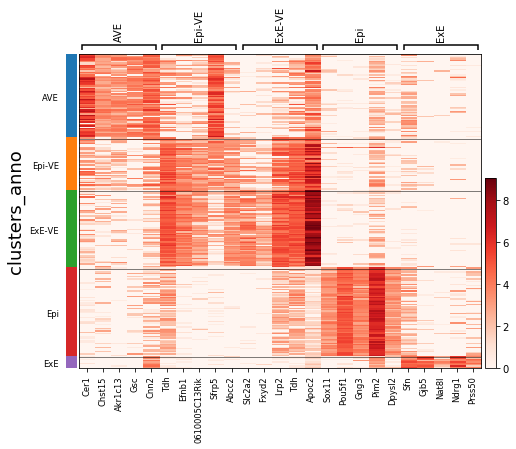

GridSpec(2, 4, height_ratios=[0.15, 6], width_ratios=[0.2, 7.5, 0, 0.2])

In [35]:
#Names of the clusters
titles_arr=np.array(['AVE','Epi-VE','ExE-VE','Epi','ExE'])

#Heatmap of the top 5 markers per cluster
sc.pl.heatmap(high_var,top_markers,groupby='clusters_anno',cmap='Reds',
              var_group_positions = [(0,4),(5,9),(10,14),(15,19),(20,24)],
              var_group_labels=list(titles_arr),show_gene_labels=True)

# Diffusion pseudotime analysis in AVE and Epi-VE clusters

## HVGs selection

In [36]:
#Select only cells from AVE and Epi-VE
norm_data_AVE_Epi_VE=norm_data[norm_data.obs['clusters_anno']!='ExE',:]
norm_data_AVE_Epi_VE=norm_data_AVE_Epi_VE[norm_data_AVE_Epi_VE.obs['clusters_anno']!='ExE-VE',:]
norm_data_AVE_Epi_VE=norm_data_AVE_Epi_VE[norm_data_AVE_Epi_VE.obs['clusters_anno']!='Epi',:]

#Compute HVGs in AVE and Epi-VE
sc.pp.highly_variable_genes(norm_data_AVE_Epi_VE,max_mean=10,n_top_genes=3000)  #calculate highly variable genes
high_var_AVE_Epi_VE = norm_data_AVE_Epi_VE[:,norm_data_AVE_Epi_VE.var['highly_variable']==True]

In [38]:
import scipy
def spearman_dist(X1,X2):
    return np.sqrt(0.5*(1.0-scipy.stats.spearmanr(X1,X2)[0]));

## Compute the diffusion map

In [45]:
# PCA
sc.tl.pca(high_var_AVE_Epi_VE,svd_solver='arpack')

#knn graph with spearman correlation
sc.pp.neighbors(high_var_AVE_Epi_VE,n_neighbors=15,metric=spearman_dist, n_pcs=10, method = 'umap')
sc.tl.diffmap(high_var_AVE_Epi_VE,n_comps=20) #compute the diffusion map

## Compute the diffusion pseudotime

In [46]:
root_id=np.argmax(high_var_AVE_Epi_VE.obsm['X_diffmap'][:,2])
high_var_AVE_Epi_VE.uns['iroot'] = root_id

#Compute diffusion pseudotime
sc.tl.dpt(high_var_AVE_Epi_VE,n_dcs=10)
pseudo=list(high_var_AVE_Epi_VE.obs['dpt_pseudotime'])

norm_data_AVE_Epi_VE.obs['dpt_pseudotime']=list(high_var_AVE_Epi_VE.obs['dpt_pseudotime'])

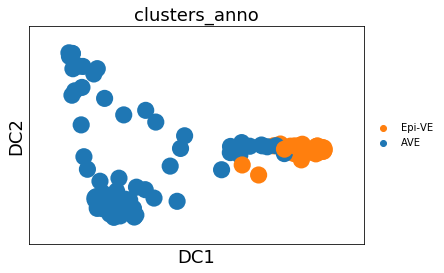

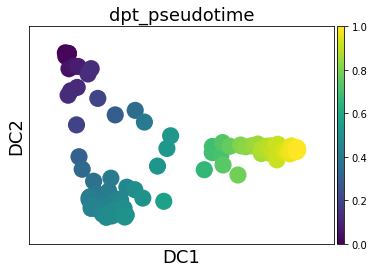

In [48]:
sc.pl.diffmap(high_var_AVE_Epi_VE,color='clusters_anno',palette=['C1','C0'])
sc.pl.diffmap(high_var_AVE_Epi_VE,color='dpt_pseudotime',palette=['C1','C0'])

## Find differentially expressed genes along dpt

In [49]:
#Filter genes expressed in less than 10 cells for DE analysis in pseudotime
tmp_adata=sc.pp.filter_genes(norm_data_AVE_Epi_VE,min_cells=10,copy=True)
new_df=tmp_adata.to_df()

In [50]:
%get new_df
%get pseudo

library(gam, quietly = TRUE, warn.conflicts = FALSE)
library(scran, quietly = TRUE, warn.conflicts = FALSE)

#Extract the diffusion pseudotime from Python and use it as the independent variable in a 
# Generalized Additive Model (GAM) 
data<-new_df
data<-t(data)

sce<-SingleCellExperiment(assays = list(counts = as.matrix(data)))
sce$Pseudotime <- pseudo

#Y is the (log-norm) count matrix for the genes expressed in at least 10 cells
Y <- counts(sce)
t <- sce$Pseudotime

#Run GAM with LOESS function for all the genes
gam.res <- apply(Y, 1, function(z){
    d <- data.frame(z=z, t=t)
    tmp <- gam(z ~ lo(t), data=d)
    p <- summary(tmp)[4][[1]][1,5]  #p-value
    f<-fitted(tmp)
    c(p,f)
})

#Build the table of the genes p-values
genes.table<-data.frame(genes.names=rownames(data))
genes.table$pvals<-gam.res[1,]
genes.table$FDR<-p.adjust(genes.table$pvals, method="fdr") #Adjust p-values
genes.table<-genes.table[order(genes.table$FDR),] #Order the genes according to the FDR
genes.table$genes.names <- as.character(genes.table$genes.names)
results.gam.tot<-genes.table[genes.table$FDR < 0.01,][c('genes.names','FDR')] #Filter the significant genes

#Save the matrix of fitted values
gam.fitted<-gam.res[-1,]

print(paste("We have"
           ,sum(genes.table$FDR < 0.01)
           ,"significant genes"))

Loaded gam 1.16.1



Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colMeans, colSums, colnames,
    dirname, do.call, duplicated, eval, evalq, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, rank, rbind,
    rowMeans, rowSums, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:base’:

    expand.grid


Welcome 

[1] "We have 915 significant genes"


In [51]:
%get results.gam.tot --from R
%get gam.fitted --from R

results_gam=list(results_gam_tot['genes.names'])

gam_fitted=ad.AnnData(gam_fitted)
gam_fitted.obs=high_var_AVE_Epi_VE.obs
gam_fitted.var_names=tmp_adata.var_names
gam_fitted=gam_fitted[:,results_gam]

Variable results.gam.tot is put to SoS as results_gam_tot
Variable gam.fitted is put to SoS as gam_fitted
/usr/local/lib/python3.7/site-packages/sos_r/kernel.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  #!/usr/bin/env python3


## Cluster the genes differentially expressed along the trajectory in pseudotime

As for the cells, we employ hierarchical clustering on the Spearman correlation matrix (of the genes) and we cut the dendrogram based on robustness analysis obtained repeating the clustering subsampling cells

In [52]:
DE_genes_df=norm_data_AVE_Epi_VE[:,results_gam].to_df()

In [53]:
%get DE_genes_df

#Robustness analysis: change the number X of the high_varX_df to compute the robustness curve for a cluster

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

data<-as.matrix(DE_genes_df)

# nr of random samples
nrRepeats = 50
# percent of cells to keep
percent = 70
# nr of cells left
sampleSize <- round(length(rownames(data))*percent/100)

myRandSample <- function(indexVector){
        idxMatrix <- matrix(rep(NA, sampleSize*nrRepeats)
                            ,nrow = nrRepeats)
        for (i in 1:nrow(idxMatrix)){
                mySample <- sample(indexVector
                                   ,size = sampleSize)
                idxMatrix[i,] <- mySample
        }
        idxMatrix
}

# indices of all the cells
cellidx <- rownames(data)
RandIdxMatrix <- myRandSample(cellidx)

# function to calculate clusters
calculateClusters <- function(geneIndices,deepSplit){
    cor.mat<-cor(data[geneIndices,],method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=50, method="hybrid", deepSplit =deepSplit)
    
    clust
}

VarInfoVector <- matrix(rep(NA, nrRepeats * 5),ncol = 5)
colnames(VarInfoVector) <- c(0,1,2,3,4)

for(j in 0:4){
    tot.clust <- calculateClusters(cellidx,j)
    for (i in 1:nrow(RandIdxMatrix)){
        # take indices of HVGs from the RandIdxMatrix of the i-th iteration
        indices <- RandIdxMatrix[i,]
        # calculate the cluster statistics with these indices and deepSplit == j
        subsample.clust <- calculateClusters(indices,j)
        if(length(duplicated(indices)[duplicated(indices) == TRUE])>0){print(ERROR)}
        #Calculate the variation of information between the two clustering (whole dataset and subsampled data)
        VarInfoVector[i,j+1] <- vi.dist(tot.clust,subsample.clust)
    }
}

[1] 71
[1] TRUE
 ..cutHeight not given, setting it to 0.775  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.772  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.776  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.776  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.775  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.772  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.77  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.78  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.771  ===>  99% of 

 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.772  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.781  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.776  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.771  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.772  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.769  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.771  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.776  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.772  ===>  99%

 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.772  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.77  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.768  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.769  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.773  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.775  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.776  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.771  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.77  ===>  99% o

 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.774  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.778  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.778  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.773  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.775  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.776  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.771  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.779  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] TRUE
 ..cutHeight not given, setting it to 0.772  ===>  99%

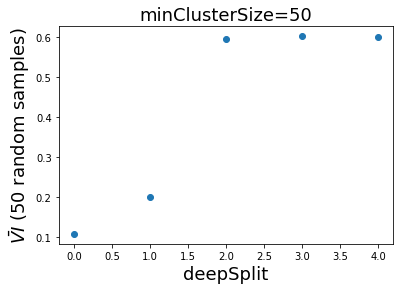

In [54]:
%get VarInfoVector --from R


#plot robustness curve and choose the value of deepSplit
plot.figure()
plot.title('minClusterSize=50')
plot.xlabel('deepSplit')
plot.ylabel(r'$\bar{VI}$ (50 random samples)')
plot.plot(np.arange(0,5),np.mean(VarInfoVector,axis=0),'o')
plot.show()
plot.close()

In [55]:
%get DE_genes_df

library(dynamicTreeCut, quietly = TRUE, warn.conflicts = FALSE)
library(WGCNA, quietly = TRUE, warn.conflicts = FALSE)
library(Rtsne, quietly = TRUE, warn.conflicts = FALSE)
library(mcclust, quietly = TRUE, warn.conflicts = FALSE)

finalClus <- function(df,deepSplit){
    data<-as.matrix(df)
    cor.mat<-cor(data,method="spearman")
    dissim<-sqrt((1-cor.mat)/2)
    dist.mat<-as.dist(dissim)
    test.clust<-hclust(dist.mat, method="average")
    clust<-cutreeDynamic(test.clust,distM=as.matrix(dist.mat), minClusterSize=50,
                         method="hybrid", deepSplit =deepSplit)
    clust
}

clust<-finalClus(DE_genes_df,1)
print(max(clust))

 ..cutHeight not given, setting it to 0.775  ===>  99% of the (truncated) height range in dendro.
 ..done.
[1] 2


<string>:30: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


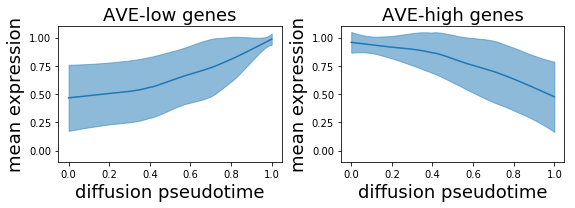

(None, None)

In [56]:
%get clust --from R
norm_data_DE_genes=norm_data_AVE_Epi_VE[:,results_gam]
norm_data_DE_genes.var['cl_labels']=list(clust)

results_gam_tot['cl_labels']=list(clust)

# #Create a dataframe with the genes divided by cluster (show the FDR)
df=pd.DataFrame({'1-names':list(results_gam_tot[results_gam_tot['cl_labels']==1]['genes.names']),
                '1-FDR':list(results_gam_tot[results_gam_tot['cl_labels']==1]['FDR'])})

for i in range(np.amax(clust)):
    i=i+1
    if i!=1:
        df1=pd.DataFrame({str(i)+'-names':list(results_gam_tot[results_gam_tot['cl_labels']==i]['genes.names']),
                         str(i)+'-FDR':list(results_gam_tot[results_gam_tot['cl_labels']==i]['FDR'])})
        df=pd.concat([df,df1], ignore_index=True, axis=1)

gam_fitted=gam_fitted.copy()
DE_genes_df=gam_fitted.T.to_df()

#Normalize expression of genes between 0 and 1
DE_genes_df_max = DE_genes_df.max(axis=1)
DE_genes_df=DE_genes_df.divide(DE_genes_df_max, axis=0)

#Add labels of the cluster for each gene
DE_genes_df['cl_lab']=list(clust)

#For each cluster compute the mean expression of the genes in each cell
mean_df=DE_genes_df.groupby('cl_lab').mean()
std_df=DE_genes_df.groupby('cl_lab').std()

mean_df=mean_df.append(high_var_AVE_Epi_VE.obs['dpt_pseudotime'])
std_df=std_df.append(high_var_AVE_Epi_VE.obs['dpt_pseudotime'])

new_columns = mean_df.columns[mean_df.ix[mean_df.last_valid_index()].argsort()]
mean_df=mean_df[new_columns]
std_df=std_df[new_columns]
mean_df=np.array(mean_df)
std_df=np.array(std_df)

#Plot the averaged expression profiles of the clusters

fig,ax=plot.subplots(1,2,figsize=(8,3))
title_label=['AVE-low genes','AVE-high genes']
for i in [1,0]:
    ax[i].set_ylim(-0.1,1.1)
    ax[i].set_title(title_label[i])
    ax[i].set_xlabel('diffusion pseudotime')
    ax[i].set_ylabel('mean expression')
    ax[i].plot(mean_df[-1],mean_df[i])
    ax[i].fill_between(mean_df[-1], 
                      mean_df[i]-std_df[i], mean_df[i]+std_df[i],
                      alpha=0.5, edgecolor='C0', facecolor='C0')
fig.tight_layout()
plot.show(),plot.close()

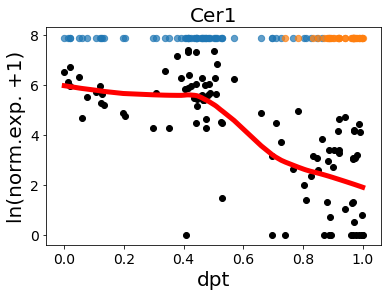

In [57]:
import matplotlib
from mlxtend.plotting import category_scatter


matplotlib.rcParams.update({'font.size': 14})
plot.rcParams.update({'axes.labelsize': 20})

#Plot the expression of genes in pseudotime
my_gene_list=['Cer1']

for i in my_gene_list:
    gname=i
    
    d={'label': high_var_AVE_Epi_VE.obs['clusters_anno'], 'x': high_var_AVE_Epi_VE.obs['dpt_pseudotime']
   , 'y': high_var_AVE_Epi_VE[:,gname].X,
   'y3': [np.amax(norm_data_AVE_Epi_VE[:,gname].X)+0.5]*len(norm_data_AVE_Epi_VE[:,gname].X)}
    df_plot=pd.DataFrame(data=d)
    df_plot=df_plot.sort_values('x')
    fig = category_scatter(x='x', y='y3', label_col='label',colors=['C0','C1'], 
                       data=df_plot, legend_loc=False,markersize=40,markers='ooo')
    plot.title(gname,fontsize=20)
    plot.xlabel('dpt')
    plot.ylabel('ln(norm.exp. +1)')
    plot.scatter(df_plot['x'],df_plot['y'],color='black')
    data=np.array([high_var_AVE_Epi_VE.obs['dpt_pseudotime'],gam_fitted[:,i].X])
    data=data.T
    data=data[np.argsort(data[:, 0])] 
    plot.plot(data[:,0],data[:,1],color='red',linewidth=5)
    plot.show(),plot.close()

# Save data for the diffusion map on the integrated stages

In [59]:
high_var_AVE_Epi_VE.write_h5ad(data_path+'high_var_AVE_Epi_VE_625.h5ad')

# Save data for the RNA velocity analysis

## E6.25 - AVE and Epi-VE cells

In [58]:
# Save a dataframe with the cluster labels for AVE and Epi-VE cells and the diffusion map coordinates
data_E625=pd.DataFrame(index=high_var_AVE_Epi_VE.obs_names,
                      data={'clusters_anno': high_var_AVE_Epi_VE.obs['clusters_anno'],
                            'DC1': high_var_AVE_Epi_VE.obsm['X_diffmap'][:,1] ,
                            'DC2': high_var_AVE_Epi_VE.obsm['X_diffmap'][:,2]})
data_E625.to_csv(data_path+'DC_625.csv')

# Versions of R and packages used

In [62]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
 [1] parallel  stats4    splines   stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] scran_1.10.2                SingleCellExperiment_1.4.1 
 [3] SummarizedExperiment_1.12.0 DelayedArray_0.8.0         
 [5] matrixStats_0.56.0          Biobase_2.42.0             
 [7] GenomicRanges_1.34.0        GenomeInfoDb_1.18.2        
 [9] IRanges_2.16.0              S4Vectors_0.20.1           
[11] BiocGenerics_0.28.0         BiocParallel_1.16.6        
[13] gam_1.16.1                  foreach_1.5.0              
[15] cluster_2.1.0               mcclust_1.0                
[17] lpSolve_5.6.15 